# Cohort_1 popgen stats

The below statistics are plotted from the "best" 400 samples from the first 1000 (cohort 1) of the SNP calls. 

In [33]:
from matplotlib import pyplot as plt
import numpy as np

## Mean individual depth

In [31]:
idepth_path = "/Users/dj20y461/Data_temp/Stickleback/FITNESS/results/test_summary_stats/cohort_1_best400.idepth"

samples = []
depths = []

with open(idepth_path) as idepths:

    header = next(idepths) ## skip the headers

    first_line = next(idepths) ## get the number of loci from the first sample
    samples.append(first_line.split()[0])
    N_loci = first_line.split()[1]
    depths.append(float(first_line.split()[2]))

    ## loop over rest of file
    for line in idepths:
        samples.append(line.split()[0])
        N_loci = line.split()[1]
        depths.append(float(line.split()[2]))


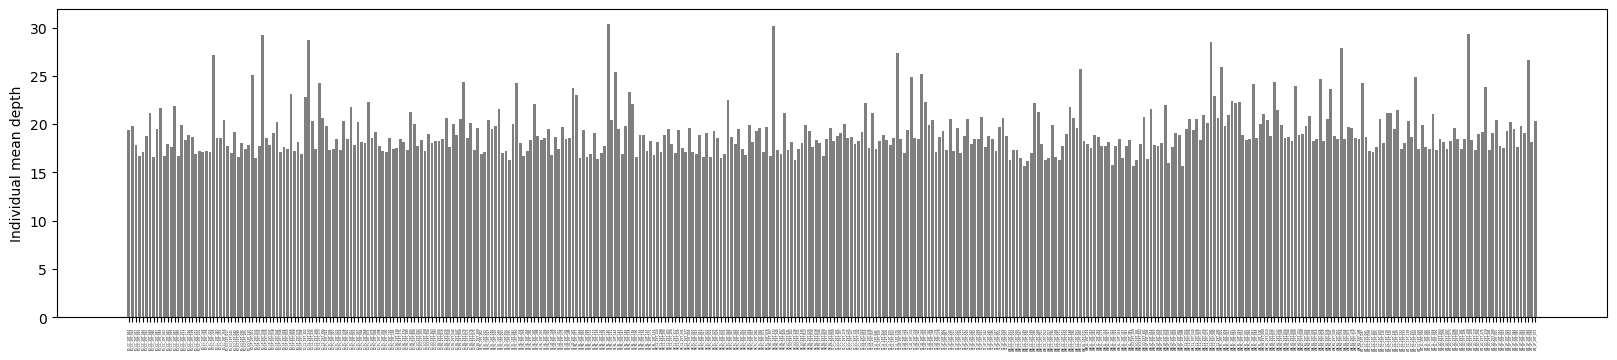

In [48]:
plt.figure(figsize = (20,4))

plt.bar(range(len(depths)),
        depths, 
        color = "black",
        alpha = 0.5)

plt.xticks(range(len(depths)),
           samples,
           rotation = 90,
           fontsize = 2)

plt.ylabel("Individual mean depth")

plt.savefig("/Users/dj20y461/Data_temp/Stickleback/FITNESS/plots/cohort_1_popgen_tests/best400_mean_cov.pdf") 
plt.show()

## Population diversity (REDO WITH best 400 DATA)

### N polymorphic sites per Mb

One measure I will use is the number of polymorphic sites per megabase in each population. . . . this is just counting the number of SNPs in each pop, and dividing by the genome size in Mb. 

In [12]:
## the numbers below are the number of SNPs after downsampling to 1% from the total and filtering. So I will correct by multiplying the number by 100.  

genome_size_Mb = 450

SNPs = {}
SNPs["FG"] = 31076
SNPs["LG"] = 39233
SNPs["SL"] = 37870
SNPs["SR"] = 32713
SNPs["TL"] = 23840
SNPs["WB"] = 34280
SNPs["WK"] = 31819
SNPs["WT"] = 41164

SNPs_Mb = {}

for pop in SNPs:
    SNPs_Mb[pop] = int(np.round(((SNPs[pop]*100)/450),0))


In [16]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   

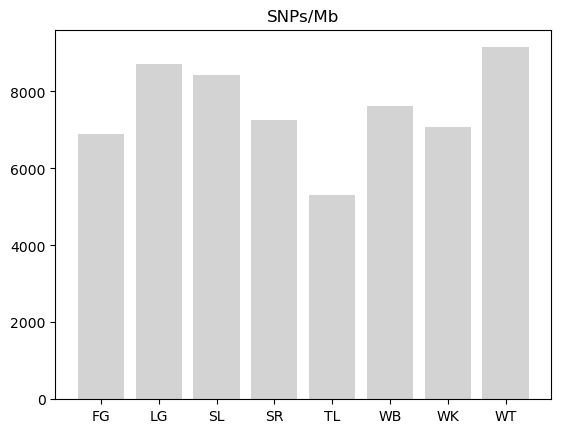

In [25]:
pos = 1
positions = []
labels = []
for pop in SNPs_Mb:
    positions.append(pos)
    labels.append(pop)
    plt.bar(pos, SNPs_Mb[pop], color = "lightgrey")
    pos += 1
    

plt.title("SNPs/Mb")    
plt.xticks(positions, labels)
plt.savefig("/Users/dj20y461/Data_temp/Stickleback/FITNESS/plots/cohort_1_popgen_tests/SNPs_per_Mb.pdf")
plt.show()